In [2]:
import pandas as pd

In [3]:
df = pd.read_feather("100k_kindle_reviews_lemmatized.feather")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 32 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   overall           100000 non-null  int64  
 1   verified          100000 non-null  bool   
 2   reviewTime        100000 non-null  object 
 3   reviewerID        100000 non-null  object 
 4   asin              100000 non-null  object 
 5   style             100000 non-null  object 
 6   reviewerName      100000 non-null  object 
 7   reviewText        100000 non-null  object 
 8   summary           100000 non-null  object 
 9   unixReviewTime    100000 non-null  int64  
 10  vote              100000 non-null  int32  
 11  image             70 non-null      object 
 12  processed_review  100000 non-null  object 
 13  lemmatized_text   100000 non-null  object 
 14  ADV               80797 non-null   float64
 15  VERB              91419 non-null   float64
 16  PRON              865

In [5]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,CCONJ,PUNCT,AUX,PART,PROPN,NUM,SPACE,INTJ,SYM,X
0,1,True,"12 27, 2014",A3JRP9RI3ZE6VK,B00JQDHIES,{'Format:': ' Kindle Edition'},e-BOOK,Truly hate it when I make a bad call on a book...,Juvenile,1419638400,...,4.0,5.0,2.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN
1,1,False,"06 25, 2016",A3IZWB0YUZXZZ6,B01H124NQQ,{'Format:': ' Kindle Edition'},Kathryn childs,Only 4% of this book is the discretion it isn'...,Not worth your time,1466812800,...,1.0,2.0,3.0,2.0,NaN,2.0,NaN,NaN,NaN,NaN
2,1,True,"05 13, 2013",A82LP6E48UFM5,B00C2E9EK4,{'Format:': ' Kindle Edition'},Amazon Customer,The quality of writing for this book is very p...,poor quality,1368403200,...,5.0,7.0,9.0,3.0,NaN,NaN,3.0,NaN,NaN,NaN
3,1,True,"05 10, 2012",AMV9B31WKSLM7,B005RH2GNU,{'Format:': ' Kindle Edition'},Eclectic Reader,"The Outback is the vast, remote, arid area of ...",Outback is in AUSTRALIA!!!,1336608000,...,NaN,5.0,3.0,NaN,3.0,NaN,2.0,NaN,NaN,NaN
4,1,True,"09 4, 2013",AZ27B4OUL64TR,B00DC7PXLY,{'Format:': ' Kindle Edition'},Word Junkie,"Grace Burrowes lives within a few miles of me,...",Not as good as its progenitor,1378252800,...,12.0,25.0,12.0,13.0,27.0,3.0,9.0,NaN,NaN,NaN


In [6]:
speech_count_columns = ['ADV', 'VERB', 'PRON', 'SCONJ', 'DET', 'ADJ', 'NOUN', 'ADP', 'CCONJ', 'PUNCT', 'AUX', 'PART', 'PROPN', 'NUM', 'SPACE', 'INTJ', 'SYM', 'X']
df[speech_count_columns] = df[speech_count_columns].fillna(0)

In [7]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,...,CCONJ,PUNCT,AUX,PART,PROPN,NUM,SPACE,INTJ,SYM,X
0,1,True,"12 27, 2014",A3JRP9RI3ZE6VK,B00JQDHIES,{'Format:': ' Kindle Edition'},e-BOOK,Truly hate it when I make a bad call on a book...,Juvenile,1419638400,...,4.0,5.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0
1,1,False,"06 25, 2016",A3IZWB0YUZXZZ6,B01H124NQQ,{'Format:': ' Kindle Edition'},Kathryn childs,Only 4% of this book is the discretion it isn'...,Not worth your time,1466812800,...,1.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0
2,1,True,"05 13, 2013",A82LP6E48UFM5,B00C2E9EK4,{'Format:': ' Kindle Edition'},Amazon Customer,The quality of writing for this book is very p...,poor quality,1368403200,...,5.0,7.0,9.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0
3,1,True,"05 10, 2012",AMV9B31WKSLM7,B005RH2GNU,{'Format:': ' Kindle Edition'},Eclectic Reader,"The Outback is the vast, remote, arid area of ...",Outback is in AUSTRALIA!!!,1336608000,...,0.0,5.0,3.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
4,1,True,"09 4, 2013",AZ27B4OUL64TR,B00DC7PXLY,{'Format:': ' Kindle Edition'},Word Junkie,"Grace Burrowes lives within a few miles of me,...",Not as good as its progenitor,1378252800,...,12.0,25.0,12.0,13.0,27.0,3.0,9.0,0.0,0.0,0.0


In [8]:
# if image is non null return 1 else 0
df['image'] = df['image'].notnull().astype('int')

replace null with empty string

In [9]:
# in review text replace null values with empty string
df['reviewText'] = df['reviewText'].fillna('')
df['summary'] = df['summary'].fillna('')

convert verfied to dummy

In [10]:
# convert verified to int 1 if true 0 if false
df['verified'] = df['verified'].astype('int')

In [11]:
df = df.drop(columns=['style'])

dropped reviewtime, already have unix representation

In [12]:
# drop the reviewTime column
df = df.drop(columns='reviewTime')

creating review length column

In [13]:
# create a new column called reviewLength
df['reviewLength'] = df['reviewText'].apply(lambda x: 0 if isinstance(x, float) else len(x))

creating summary length column

In [14]:
# create a new column called summaryLength (There were some NaN values in summary, which was forcing the type to be float64.  This ensures everything is an int).
df['summaryLength'] = df['summary'].apply(lambda x: 0 if isinstance(x, float) else len(x))

asin is the amazon product id. removing this and the reviewer info

In [15]:
# removing asin, reviewerID, reviewerName
df = df.drop(columns=['asin', 'reviewerID', 'reviewerName'])

labeling categorical variables

In [16]:
# labeling ['verified', 'image'] as categorical
df[['overall', 'verified', 'image']] = df[['overall', 'verified', 'image']].astype('category')

reviewing data

In [17]:
df.head()

,overall,verified,reviewText,summary,unixReviewTime,vote,image,processed_review,lemmatized_text,ADV,...,AUX,PART,PROPN,NUM,SPACE,INTJ,SYM,X,reviewLength,summaryLength
0,1,1,Truly hate it when I make a bad call on a book...,Juvenile,1419638400,0,0,truly hate bad book waste money . honestly fin...,truly hate bad book waste money . honestly fin...,4.0,...,2.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,272,8
1,1,0,Only 4% of this book is the discretion it isn'...,Not worth your time,1466812800,0,0,4 % book discretion worth time money . say 800...,4 % book discretion worth time money . say 800...,1.0,...,3.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,106,19
2,1,1,The quality of writing for this book is very p...,poor quality,1368403200,0,0,quality writing book poor . understand insta...,quality writing book poor . understand insta...,6.0,...,9.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,425,12
3,1,1,"The Outback is the vast, remote, arid area of ...",Outback is in AUSTRALIA!!!,1336608000,0,0,"Outback vast , remote , arid area Australia ac...","Outback vast , remote , arid area Australia ac...",1.0,...,3.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0,145,26
4,1,1,"Grace Burrowes lives within a few miles of me,...",Not as good as its progenitor,1378252800,0,0,"Grace Burrowes live mile , want tell enjoy Gro...","Grace Burrowes live mile , want tell enjoy Gro...",13.0,...,12.0,13.0,27.0,3.0,9.0,0.0,0.0,0.0,1235,29


## GridSearch for Ideal Model

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier

pipeline = Pipeline(steps=[
    ("vect", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("clf", SGDClassifier())
])

param_grid ={
    "vect__ngram_range": [(1, 3)], # Other ngram options were tried.
    "vect__strip_accents": [None], # Other vars were tried
    "vect__stop_words": [None], # Other vars were tried
    "tfidf__norm": ["l2"], # Other vars were tried
    "tfidf__sublinear_tf": [True], # Other vars were tried
    "tfidf__use_idf": [True], # Other vars were tried
    "clf__alpha": [0.00001], # Other vars were tried
    "clf__penalty": ["elasticnet"], # Other vars were tried
    "clf__loss": ["log_loss"] # Other vars were tried
}

X, y = df['reviewText'] +  df['summary'], df['overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

search = GridSearchCV(pipeline, param_grid, n_jobs=4, verbose=3, cv=3, error_score=0.0)
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


KeyboardInterrupt: 

Number of training samples: 75000
Micro-averaged F1 score on test set: 0.624
Accuracy of model: 0.6237


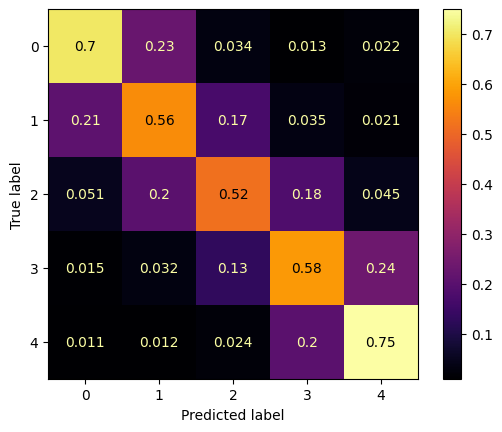

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

pipeline = Pipeline(steps=[
    ("vect", CountVectorizer()),
    ("tfidf", TfidfTransformer()),
    ("clf", SGDClassifier())
])

best_params = {
    'vect__ngram_range': (1, 3),
    'vect__stop_words': None,
    'vect__strip_accents': None,
    'tfidf__norm': 'l2',
    'tfidf__sublinear_tf': True,
    'tfidf__use_idf': True,
    'clf__alpha': 1e-05, 
    'clf__loss': 'log_loss', 
    'clf__penalty': 'elasticnet', 
}

classifier = pipeline.set_params(**best_params)

# The space is important, otherwise this accidentally creates joined words.
X, y = df['reviewText'] + " " + df['summary'],  df['overall']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=55)

print("Number of training samples:", len(X_train))

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("Micro-averaged F1 score on test set: %0.3f"% f1_score(y_test, y_pred, average="micro"))

accuracy = classifier.score(X_test, y_test)
print(f"Accuracy of model: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='inferno')